In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib_inline
# import missingno as msno
from sklearn.feature_extraction.text import TfidfVectorizer
from IPython.display import Image
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances, manhattan_distance

0. 데이터 준비

In [2]:
import os
# print(os.getcwd())

In [7]:
# 경로설정 버전 1
# 폴더이름 + 파일이름. 
# (노트북의 위치는 중요치 않고. 폴더이름 + 파일이름으로 절대 경로를 생성)

In [8]:
# 폴더경로 얻기.
base1 = os.path.dirname(r'C:\Users\jlune\carbon\project_JI\0.Model\data\MovieCrawlerFile_disney.csv')
# 파일위치에 절대경로 넣어주시면 됩니다.
file1 = os.path.basename(r'C:\Users\jlune\carbon\project_JI\0.Model\data\MovieCrawlerFile_wavve.csv')
file2 = os.path.basename(r'C:\Users\jlune\carbon\project_JI\0.Model\data\MovieCrawlerFile_netflix.csv')
file3 = os.path.basename(r'C:\Users\jlune\carbon\project_JI\0.Model\data\MovieCrawlerFile_wacha.csv')
file4 = os.path.basename(r'C:\Users\jlune\carbon\project_JI\0.Model\data\MovieCrawlerFile_disney.csv')
base1 +'\\'+file1 # os.path.join(base1,file1)

'C:\\Users\\jlune\\carbon\\project_JI\\0.Model\\data\\MovieCrawlerFile_wavve.csv'

In [9]:
# ver2는 노트북이 있는 폴더를 base로 하여. /data 폴더를 만들어 파일들을 넣었다고 가정.
# base dir + 하위 경로
# r'C:\Users\jlune\carbon\project_JI\0.Model + \data\MovieCrawlerFile_disney.csv 형태
os.getcwd() # 현재폴더 경로 확인
pp = os.path.join(os.getcwd()+r'\data\filename')
# pd.read_csv(pp)

In [11]:
temp1 = pd.read_csv(os.path.join(base1, file1))
temp2 = pd.read_csv(os.path.join(base1, file2))
temp3 = pd.read_csv(os.path.join(base1, file3))
temp4 = pd.read_csv(os.path.join(base1, file4))
print(len(temp1), len(temp2), len(temp3), len(temp4))

10780 3449 5591 978


In [12]:
10780 + 3449 + 5591 + 978

20798

In [13]:
temp1.head().columns

Index(['actors', 'director', 'genre', 'imdb_rating', 'just_rating',
       'opening_date', 'posterLink', 'runtime', 'synopsis', 'title_kor'],
      dtype='object')

In [15]:
temp1['Mark'] = 'vv' # 웨이브. 소문자.
temp2['Mark'] = 'N' #넷플
temp3['Mark'] = 'W' #왓챠
temp4['Mark'] = 'D' #디즈니
temp1.head(1)

,actors,director,genre,imdb_rating,just_rating,opening_date,posterLink,runtime,synopsis,title_kor,Mark
0,"C.V.France,HelenHaye,JillEsmond,EdmundGwenn,Jo...",AlfredHitchcock,드라마,5.7,61%,1931.0,https://images.justwatch.com/poster/184474051/...,1시간22분,부자 가족 힐크리스트는 자신들의 땅에 공장을 짓기 위해 가난한 농부가 보낸 투자사기...,스킨 게임,vv


In [109]:
t1 = pd.concat([temp1, temp2] , axis=0)
t2 = pd.concat([t1,temp3], axis=0)
t3 = pd.concat([t2,temp4], axis=0)
# t1.info()
t3.info() #개봉일이 opening year로 스트링으로 바꿀것. 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20798 entries, 0 to 977
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   actors        19704 non-null  object 
 1   director      19901 non-null  object 
 2   genre         20351 non-null  object 
 3   imdb_rating   19639 non-null  object 
 4   just_rating   19639 non-null  object 
 5   opening_date  20686 non-null  float64
 6   posterLink    11677 non-null  object 
 7   runtime       20686 non-null  object 
 8   synopsis      20643 non-null  object 
 9   title_kor     20686 non-null  object 
 10  Mark          20798 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.9+ MB


In [110]:
# 컬럼순서및 sorting
#  df = df[['name', 'sex', 'age', 'height']]
# df
y = t3.columns.tolist()

In [111]:
df_total = t3[['title_kor','opening_date','genre','director','actors','synopsis',
         'imdb_rating','just_rating','runtime','posterLink','Mark']]
dt_backborn = df_total.copy()  # 백업용 카피
# dt_backborn.to_csv('backup.csv', index=None)

In [112]:
df_total.drop_duplicates(subset=['title_kor'], inplace=True, ignore_index=True)

In [113]:
# opening_date type  float => str으로 변경.
df_total = df_total.astype({'opening_date':'str'})
# 1928.0 에서 년도만 취하기 -> 1928
df_total['opening_date'] = [x[:-2] for x in df_total.opening_date.values]
# df_total.head(2)
df_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14484 entries, 0 to 14483
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title_kor     14483 non-null  object
 1   opening_date  14484 non-null  object
 2   genre         14248 non-null  object
 3   director      13894 non-null  object
 4   actors        13794 non-null  object
 5   synopsis      14451 non-null  object
 6   imdb_rating   13736 non-null  object
 7   just_rating   13736 non-null  object
 8   runtime       14483 non-null  object
 9   posterLink    11146 non-null  object
 10  Mark          14484 non-null  object
dtypes: object(11)
memory usage: 1.2+ MB


In [135]:
df_total.sort_values(by=['opening_date'],ascending=True, inplace=True, ignore_index=True)
df_total
df_total.to_csv(r'./save/df_total.csv')

In [170]:
df = df_total.copy()

### 1. 전처리 및 sorting

In [171]:
len(df)

14484

In [172]:
# 제목 데이터 확인 및 결측치 분석
# title 결측치가 103개인데 급한대로 수정 못하니 드랍하고 갑니다.
# 추후 데이터 확인시 보완. 할것. 0324
df.isnull().sum()
# df['title_kor'].isnull()

title_kor          1
opening_date       0
genre            236
director         590
actors           690
synopsis          33
imdb_rating      748
just_rating      748
runtime            1
posterLink      3338
Mark               0
dtype: int64

In [173]:
df = df.dropna(subset=['title_kor']) # 제목의 결측치 드랍.
len(df)

14483

In [174]:
df.isnull().sum() # 시놉의 결측치 드랍
df = df.dropna(subset=['synopsis'])
len(df)

14451

In [175]:
# 장르데이터 널값 채우기
# 평점데이터 널값 3.0으로 채우기. 0~10까지. 3.점이하 의미없음으로 보아 3점으로 채워준다. 
df.genre.fillna('missing', inplace=True)
df.imdb_rating.fillna('3.0', inplace=True)
df.isnull().sum()

title_kor          0
opening_date       0
genre              0
director         569
actors           670
synopsis           0
imdb_rating        0
just_rating      726
runtime            0
posterLink      3319
Mark               0
dtype: int64

In [176]:
len(df) #14451개로 출발 #마크 정확치 않다. 방법찾아야. 

14451

In [177]:
# 인덱스 리셋. 
df.reset_index(drop=True, inplace=True)

### 2. 

In [178]:
# 텍스트결합용. df 셋팅
# 전략은 row의 data 분리 후 합치기. 제목. 장르 감독 액터 시놉 마크? 
# (마크는 개인화 버전 OTT 별 추천에서나 고려해봐야 할듯)


df.columns

Index(['title_kor', 'opening_date', 'genre', 'director', 'actors', 'synopsis',
       'imdb_rating', 'just_rating', 'runtime', 'posterLink', 'Mark'],
      dtype='object')

In [179]:
df[:1].values

array([['증기선 윌리', '1928', '애니메이션', 'UbIwerks', 'WaltDisney',
        '첫 미키 마우스 애니메이션 개봉작이자 동시 녹음을 활용한 최초의 애니메이션. 배 위의 장난꾸러기 선원 미키는 미니를 기쁘게 하기 위해 동물들을 악기 삼아 “짚 속의 칠면조”를 연주한다. 포악한 피트 선장의 화를 돋운 미키는 조리실에서 감자 깎는 일을 하게 된다.',
        '80%', '80%', '8min',
        'https://images.justwatch.com/poster/18697230/s592', 'D']],
      dtype=object)

In [180]:
df[['title_kor','genre']][1:2].values

array([['스킨 게임', '드라마']], dtype=object)

In [181]:
# for p in df_input.imdb_rating.values:
#     if len(p) > 3:
#         p=p[:2]
#         imdb
#     else:
#         p=' '
# df_input.isnull().sum()

In [182]:
# 텍스트 결합을 위한 input 준비
# df_input = df.iloc[:,0:7] #제목부터 시놉 까지 셀렉 + imdb rating
df_input = df.iloc[:,0:6] # 평점 당장 사용 어려워 드랍
df_input = df_input.drop(['opening_date'], axis=1)

In [183]:
df_input.columns

Index(['title_kor', 'genre', 'director', 'actors', 'synopsis'], dtype='object')

In [184]:
a= df_input[1:2].values
a

array([['스킨 게임', '드라마', 'AlfredHitchcock',
        'C.V.France,HelenHaye,JillEsmond,EdmundGwenn,JohnLongden,PhyllisKonstam,FrankLawton,EdwardChapman,DoraGregory,GeorgeBancroft,R.E.Jeffrey,HerbertRoss,RonaldFrankau,RodneyAckland,IvorBarnard,WallyPatch',
        '부자 가족 힐크리스트는 자신들의 땅에 공장을 짓기 위해 가난한 농부가 보낸 투자사기 전문가 혼블로워와 싸움을 시작한다.\n 그러던 어느 날 힐크리스트 부인은 혼블로워의 부인이 매춘을 했다는 사실을 알게 되고 이 사실을 그의 사업에 이용하여 협박편지를 보낸다. 그러자 결국 클로 혼블로워 부인은 자살을 하게 된다.']],
      dtype=object)

In [185]:
b = a[0][:]
b[:].tolist()
len(b[:].tolist()), b[:].tolist()

(5,
 ['스킨 게임',
  '드라마',
  'AlfredHitchcock',
  'C.V.France,HelenHaye,JillEsmond,EdmundGwenn,JohnLongden,PhyllisKonstam,FrankLawton,EdwardChapman,DoraGregory,GeorgeBancroft,R.E.Jeffrey,HerbertRoss,RonaldFrankau,RodneyAckland,IvorBarnard,WallyPatch',
  '부자 가족 힐크리스트는 자신들의 땅에 공장을 짓기 위해 가난한 농부가 보낸 투자사기 전문가 혼블로워와 싸움을 시작한다.\n 그러던 어느 날 힐크리스트 부인은 혼블로워의 부인이 매춘을 했다는 사실을 알게 되고 이 사실을 그의 사업에 이용하여 협박편지를 보낸다. 그러자 결국 클로 혼블로워 부인은 자살을 하게 된다.'])

In [186]:
intext = " ".join(b[:].tolist())
intext.replace('"','')  #리플레이스 고민. 안먹네.
intext

'스킨 게임 드라마 AlfredHitchcock C.V.France,HelenHaye,JillEsmond,EdmundGwenn,JohnLongden,PhyllisKonstam,FrankLawton,EdwardChapman,DoraGregory,GeorgeBancroft,R.E.Jeffrey,HerbertRoss,RonaldFrankau,RodneyAckland,IvorBarnard,WallyPatch 부자 가족 힐크리스트는 자신들의 땅에 공장을 짓기 위해 가난한 농부가 보낸 투자사기 전문가 혼블로워와 싸움을 시작한다.\n 그러던 어느 날 힐크리스트 부인은 혼블로워의 부인이 매춘을 했다는 사실을 알게 되고 이 사실을 그의 사업에 이용하여 협박편지를 보낸다. 그러자 결국 클로 혼블로워 부인은 자살을 하게 된다.'

In [187]:
type(str('1.0'))

str

In [188]:
for i in range(5):
    print(i)

0
1
2
3
4


In [189]:
t_list = []
df_input.fillna(' ', inplace=True) # 후에 공백으로 채우던 결과 변경되는지 확인
for i in range(len(df)):
    s1 = df_input[i:i+1].values
    # print(i)
    try:
        s2 = str(" ".join(s1[0][:].tolist()))
    except:
        print(i)
        pass
    t_list.append(s2)
pd.Series(t_list)

0        증기선 윌리 애니메이션 UbIwerks WaltDisney 첫 미키 마우스 애니메이...
1        스킨 게임 드라마 AlfredHitchcock C.V.France,HelenHaye...
2        리치 앤 스트레인지 드라마,로맨스,스릴러,코미디 AlfredHitchcock Hen...
3        공공의 적 드라마,범죄 WilliamA.Wellman JamesCagney,Jean...
4        그랜드 호텔 로맨스,드라마,MadeinEurope EdmundGoulding Gre...
                               ...                        
14446    위크엔드 어웨이 스릴러,드라마,범죄 KimFarrant LeightonMeester...
14447    텍사스 전기톱 학살 2022 공포,스릴러,범죄 DavidBlueGarcia Sara...
14448    얼어버린 시간 속에서 역사,드라마 PeterFlinth NikolajCoster-W...
14449    레스틀리스 스릴러,액션,범죄   FranckGastambide,SimonAbkari...
14450    삼국지 관운장: 청룡언월도 missing 대예림 관지빈,육수명,진송 천하를 호령하던...
Length: 14451, dtype: object

In [190]:
t_list[0]

'증기선 윌리 애니메이션 UbIwerks WaltDisney 첫 미키 마우스 애니메이션 개봉작이자 동시 녹음을 활용한 최초의 애니메이션. 배 위의 장난꾸러기 선원 미키는 미니를 기쁘게 하기 위해 동물들을 악기 삼아 “짚 속의 칠면조”를 연주한다. 포악한 피트 선장의 화를 돋운 미키는 조리실에서 감자 깎는 일을 하게 된다.'

In [191]:
len(df)

14451

In [192]:
df_U4 = df[['title_kor','synopsis']].rename(columns={"title_kor":"title", "synopsis":'synopsis'})

In [193]:
df_U4  # 평점도 달아줘야해.

,title,synopsis
0,증기선 윌리,첫 미키 마우스 애니메이션 개봉작이자 동시 녹음을 활용한 최초의 애니메이션. 배 위...
1,스킨 게임,부자 가족 힐크리스트는 자신들의 땅에 공장을 짓기 위해 가난한 농부가 보낸 투자사기...
2,리치 앤 스트레인지,영화는 노동자인 프레드와 그의 부인 에밀리가 그들이 살아있는 동안 평생 뭐든지 할 ...
3,공공의 적,"금주령 시대, 탐 파워스는 술집, 당구장 등을 어슬렁대며 퍼티 노우즈 같은 불량한 ..."
4,그랜드 호텔,독일에 있는 그랜드호텔을 무대로 한 인간군상극(人間群像劇)이다. 무대는 각계 각층의...
...,...,...
14446,위크엔드 어웨이,크로아티아에 함께 여행 온 절친이 사라졌다. 베스는 친구의 행적을 필사적으로 추적하...
14447,텍사스 전기톱 학살 2022,텍사스의 한 유령 도시. 이곳에 생기를 불어넣겠다는 꿈을 안고 도착한 인플루언서들....
14448,얼어버린 시간 속에서,잃어버린 지도를 찾기 위해 탐험을 떠난 이들. 두 남자가 광활한 그린란드에서 생존을...
14449,레스틀리스,극단적인 방법으로 사건을 은폐해 버린 부패 경찰. 정체불명의 목격자로부터 협박을 받...


In [194]:
df_U4['input_t'] = t_list

In [195]:
df_U4

,title,synopsis,input_t
0,증기선 윌리,첫 미키 마우스 애니메이션 개봉작이자 동시 녹음을 활용한 최초의 애니메이션. 배 위...,증기선 윌리 애니메이션 UbIwerks WaltDisney 첫 미키 마우스 애니메이...
1,스킨 게임,부자 가족 힐크리스트는 자신들의 땅에 공장을 짓기 위해 가난한 농부가 보낸 투자사기...,"스킨 게임 드라마 AlfredHitchcock C.V.France,HelenHaye..."
2,리치 앤 스트레인지,영화는 노동자인 프레드와 그의 부인 에밀리가 그들이 살아있는 동안 평생 뭐든지 할 ...,"리치 앤 스트레인지 드라마,로맨스,스릴러,코미디 AlfredHitchcock Hen..."
3,공공의 적,"금주령 시대, 탐 파워스는 술집, 당구장 등을 어슬렁대며 퍼티 노우즈 같은 불량한 ...","공공의 적 드라마,범죄 WilliamA.Wellman JamesCagney,Jean..."
4,그랜드 호텔,독일에 있는 그랜드호텔을 무대로 한 인간군상극(人間群像劇)이다. 무대는 각계 각층의...,"그랜드 호텔 로맨스,드라마,MadeinEurope EdmundGoulding Gre..."
...,...,...,...
14446,위크엔드 어웨이,크로아티아에 함께 여행 온 절친이 사라졌다. 베스는 친구의 행적을 필사적으로 추적하...,"위크엔드 어웨이 스릴러,드라마,범죄 KimFarrant LeightonMeester..."
14447,텍사스 전기톱 학살 2022,텍사스의 한 유령 도시. 이곳에 생기를 불어넣겠다는 꿈을 안고 도착한 인플루언서들....,"텍사스 전기톱 학살 2022 공포,스릴러,범죄 DavidBlueGarcia Sara..."
14448,얼어버린 시간 속에서,잃어버린 지도를 찾기 위해 탐험을 떠난 이들. 두 남자가 광활한 그린란드에서 생존을...,"얼어버린 시간 속에서 역사,드라마 PeterFlinth NikolajCoster-W..."
14449,레스틀리스,극단적인 방법으로 사건을 은폐해 버린 부패 경찰. 정체불명의 목격자로부터 협박을 받...,"레스틀리스 스릴러,액션,범죄 FranckGastambide,SimonAbkari..."


In [203]:
# df_U4['input_t'][0]

'증기선 윌리 애니메이션 UbIwerks WaltDisney 첫 미키 마우스 애니메이션 개봉작이자 동시 녹음을 활용한 최초의 애니메이션. 배 위의 장난꾸러기 선원 미키는 미니를 기쁘게 하기 위해 동물들을 악기 삼아 “짚 속의 칠면조”를 연주한다. 포악한 피트 선장의 화를 돋운 미키는 조리실에서 감자 깎는 일을 하게 된다.'

## 3. 피쳐 벡터라이즈

In [204]:
df_U4.reset_index(drop=True, inplace=True)
sent = []

for i in (range(0,len(df_U4))):
    content = df_U4['input_t'][i]
    sent.append(content)
len(sent)

14451

In [205]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer()
tfidf_matrix=tfidf.fit_transform(sent)

In [206]:
tfidf_matrix[0].shape
# (1, 160805) 모델 원으 경우. 

(1, 339429)

In [207]:
# cos U
from sklearn.metrics.pairwise import cosine_similarity
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)
cos_sim.shape, type(cos_sim)

((14451, 14451), numpy.ndarray)

In [208]:
indices = pd.Series(df_U4.index, index=df_U4.title)
indices.head()

title
증기선 윌리        0
스킨 게임         1
리치 앤 스트레인지    2
공공의 적         3
그랜드 호텔        4
dtype: int64

In [209]:
# 상위10개
def get_recommendation(title, cos_sim=cos_sim):
    index = indices[title]
    sim_scores = pd.Series(cos_sim[index])
    movie_indices = sim_scores.sort_values(ascending=False).head(11).tail(10).index
    result = df_U4.title.iloc[movie_indices]
    return result

In [45]:
get_recommendation('반지의 제왕: 반지 원정대')

# 9010     반지의 제왕: 두 개의 탑
# 1350      성기사단: 어둠의 마법사
# 7364            마법사의 제자
# 2087       잃어버린 제국을 찾아서
# 2170    신데렐라: 마법 반지의 비밀
# 모델 원. 차이점 생각해볼것 .겹치는 단어가 많이 늘었어. 벡터화에따라 
# 현재는 cos u (가장 좋기도 하다.)에 따라 판단. 단어단위기도 한데. 불용어 처리 및 전처리 후에 테스트 다시 볼 것. 

7980                성기사단: 어둠의 마법사
2706                      마법사의 제자
3071               로덴시아: 마법왕국의 전설
9421                  라야와 마지막 드래곤
2699                     라스트 에어벤더
3802    드래곤 네스트: 평화 기사단 VS 블랙 드래곤
8709                        헤븐퀘스트
8259                         헤드헌터
4201                  우리별 일호와 얼룩소
6434                 스키타이: 불멸의 전사
Name: title, dtype: object

In [210]:
get_recommendation('반지의 제왕: 반지 원정대') # 변경 후 

2147        반지의 제왕: 두 개의 탑
2299         반지의 제왕: 왕의 귀환
4825            호빗: 뜻밖의 여정
6084          호빗: 다섯 군대 전투
5318          호빗: 스마우그의 폐허
11221        성기사단: 어둠의 마법사
2770                    킹콩
3726                러블리 본즈
10505                모털 엔진
14005    잉글리시 북 클럽: 반지의 제왕
Name: title, dtype: object

In [46]:
# 연인 중복 키값 에러 확인
get_recommendation('연인')

2985                  엘르
8806    사이다처럼 말이 톡톡 솟아올라
6406             #리얼리티하이
9628              스케이터 걸
9726             더 프리빌리지
515          수잔 브링크의 아리랑
2405     엘 시크레토: 비밀의 눈동자
8556              파리의 인어
9708              히즈 올 댓
3259                늑대소년
Name: title, dtype: object

In [211]:
get_recommendation('연인') #변경 후.

14385              셰터드
13140             개인교습
334             감각의 제국
1007       수잔 브링크의 아리랑
9999               템프팅
8619        에브리씽, 에브리씽
7610        Cold War 2
8901     엘리스의 50가지 그림자
930                니키타
441                라 붐
Name: title, dtype: object

In [212]:
# get_recommendation('코만도') 중복 키값 에러.  왓챠에서 두개 겹쳐 .

SyntaxError: invalid syntax (4064119701.py, line 1)

In [48]:
get_recommendation('부산행')
# 2335     웨스트 오브 헬
# 4982       최후의 인류
# 618          최미역행
# 679           러브컷
# 10514    카산드라 크로싱
# Name: title, dtype: object

# 웨스트 오브 헬 만 남고 나머지 순위 왜 바뀌었는지 감독 .배우 등으로 체크. 그후 시각화 고려

6633              웨스트 오브 헬
5139                  7:19
8993            뉴스 오브 더 월드
6177                    달링
9017              프리키 데스데이
9578    이스케이프 룸 2: 노 웨이 아웃
2792                 더티 픽처
6676              워킹 데드 나잇
7173              아메리칸 라이더
5883             홍콩 좀비 히어로
Name: title, dtype: object

In [213]:
get_recommendation('부산행')

7877       서울역
9754        염력
4589       도가니
5622       사이비
5406     롤러코스터
6175        거인
8854       더 킹
11535      기생충
10350      마약왕
4111      부당거래
Name: title, dtype: object

In [214]:
get_recommendation('증기선 윌리')

6440             갓즈 포켓
5172                터키
19             외로운 유령들
5197     신데렐라: 트랩 오브 허
5508            사랑과 전쟁
3658         부다페스트 로큰롤
1679         미키의 크리스마스
94            플루토와 소시지
13316        추억의 검정고무신
5647      미피의 동물원 보물찾기
Name: title, dtype: object

In [215]:
get_recommendation('삼국지 관운장: 청룡언월도')

4509             삼국지: 명장 관우
12720               신해석 삼국지
14234                 진삼국무쌍
9847            삼국지: 황건적의 난
3575             삼국지: 용의 부활
5211              대명겁: 천하대전
9692     로스트 바이킹: 전쟁의 신의 아들
12640          삼국지 : 무신 조자룡
13643                     킨
11567                  도술혈전
Name: title, dtype: object

In [216]:
get_recommendation('레스틀리스')

10317              택시 5
11366            퍼스트 러브
10051    어웨이크너: 히어로의 탄생
8776            다크 메르디안
2714               호스티지
1257               중경삼림
11289           블랙 앤 블루
3493              모던 보이
12346              잘리카투
5280            복잡한 이야기
Name: title, dtype: object

In [217]:
get_recommendation('다크 나이트 라이즈')

3979                 인셉션
3485              다크 나이트
6516         Interstelar
5326         아웃 오브 더 퍼니스
10545    엔드 게임: 생이 끝나갈 때
7833         배트맨: 배드 블러드
5347                 돈 존
8774                덩케르크
5308      더 울프 오브 월 스트리트
2731             배트맨 비긴즈
Name: title, dtype: object

In [218]:
get_recommendation('다크 나이트')

2731                           배트맨 비긴즈
5447     레고 배트맨: 더 무비 - DC 수퍼히어로즈 유나이트
4813                        다크 나이트 라이즈
8779                         레고 배트맨 무비
1278                           배트맨 포에버
13184                   토네이도: 지구 재앙의 날
13945                           아웃브레이크
9173                      감염: 지구 최후의 날
6426                              닌자터틀
7892                      배트맨: 더 킬링 조크
Name: title, dtype: object

In [219]:
get_recommendation('쇼생크 탈출')

1660           그린 마일
5859              설계
10149    해브 어 나이스 데이
2121          언디스퓨티드
3533           멋진 하루
13240           프리즈너
3148             미스트
8720             빠삐용
405             사부출마
2047         역고력고신년재
Name: title, dtype: object

In [220]:
get_recommendation('대부')

303                       대부 2
911                       대부 3
6280      파라다이스 로스트: 마약 카르텔의 왕
11642    점박이 한반도의 공룡 2: 새로운 낙원
1736                      빅 대디
1505                   마녀의 사랑법
12186           비밀정보원: 인 더 프리즌
3113                  코드네임 더 몰
1965      Apocalypse Now Redux
10350                      마약왕
Name: title, dtype: object

In [221]:
get_recommendation('마약왕')

7341         내부자들
4454            퀵
12382           돈
12141         비스트
8860         1987
5436     더 테러 라이브
12753     남산의 부장들
9781           창궐
8812          원라인
11711         말모이
Name: title, dtype: object

In [ ]:
# 평점기반으로 추천 위아래. 점수 변경되도록. 스코어 나오게

In [222]:
def get_index(title, df=df_U4):
    index = df_U4.index[(df_U4['title'] == title)].to_list()
    return index 

get_index('부산행')

[8386]

In [227]:
get_index('핵소 고지')

[8104]

In [228]:
def get_title(index, df=df_U4):
    title = df_U4['title'][(df_U4.index == index)], df_U4['synopsis'][index]
    return title

get_title(8104)

(8104    핵소 고지
 Name: title, dtype: object,
 '비폭력주의자인 도스는 전쟁으로부터 조국과 소중한 사람들을 지키기 위해 총을 들지 않아도 되는 의무병으로 육군에 자진 입대한다. 총을 들 수 없다는 이유로 필수 훈련 중 하나인 총기 훈련 마저 거부한 도스는 동료 병사들과 군 전체의 비난과 조롱을 받게 된다. 결국 군사재판까지 받게 되지만 끝까지 자신의 신념을 굽히지 않은 도스에게 군 상부는 오키나와 전투에 총기 없이 의무병으로 참전할 것을 허락하는데…')

In [229]:
# 중복검출기 영화이름을 치면. 인덱스 반환
print(df_U4.index[(df_U4['title'] == '연인')].to_list())

[1051]


In [52]:
# # 20개만 추려 상관관계 보고자.
# alist = []
# for i in range(20):
#     c = df['title_kor'][i]
#     alist.append(c)
# # alist
# len(alist)
# # 베스트셀러, 및 코만도 중복 키 값으로 에러 일어날것. 아래 에러패스 방법

20

In [231]:
# 모든영화 추천 상위 10개씩.
ab_list = df['title_kor'][:]
len(ab_list), ab_list

(14451,
 0                 증기선 윌리
 1                  스킨 게임
 2             리치 앤 스트레인지
 3                  공공의 적
 4                 그랜드 호텔
               ...       
 14446           위크엔드 어웨이
 14447    텍사스 전기톱 학살 2022
 14448        얼어버린 시간 속에서
 14449              레스틀리스
 14450     삼국지 관운장: 청룡언월도
 Name: title_kor, Length: 14451, dtype: object)

In [232]:
df_result = pd.DataFrame()    
for i in ab_list:
    try : 
        s = pd.DataFrame(get_recommendation(i))
        s.columns = [i]   # 컬럼네임 title => 영화제목으로 변경
        # s.rename(columns={'title':i})
        s.reset_index(drop=True, inplace=True) # 인덱스, 컨캣 시 에러를 띄우는 인덱스 정렬용.
        df_result = pd.concat([df_result, s], axis=1)  # 열 방향으로 컨캣
    except:
        print(i)  # 키 중복으로 겟 레커멘드가. 영화를 특정하지 못함. 인덱스 반환으로 제목 확인. 중복된 제목임.
        pass
df_result.T

내 꿈은 컬러 꿈 #1 : the Green Moon


,0,1,2,3,4,5,6,7,8,9
증기선 윌리,갓즈 포켓,터키,외로운 유령들,신데렐라: 트랩 오브 허,사랑과 전쟁,부다페스트 로큰롤,미키의 크리스마스,플루토와 소시지,추억의 검정고무신,미피의 동물원 보물찾기
스킨 게임,더 퍼지: 최초의 시작,듀플렉스,영 앤 이노센트,39 계단,허비: 돌아오다,오 마이 파더!,덤보,더 디바이스,용재강호,나는 나를 파괴할 권리가 있다
리치 앤 스트레인지,럭키 원스,데스 룰렛,까시,리노의 도박사,크루즈 패밀리,비와 당신의 이야기,나의 연기 워크샵,영 앤 이노센트,서브웨이,스튜핏 영 하트
공공의 적,미싱 윌리엄,포효하는 20년대,스타 탄생,더 해머,라이즈 오브 더 풋솔져 3,하이 앤 마이티,프로페서 앤 매드맨,나이팅게일: 폴링 인 러브,장산범,그랜드 호텔
그랜드 호텔,미스터 마구,퀸 크리스티나,스미스씨 워싱톤에 가다,위대한 독재자,몬스터 호텔 3,밀리언 달러 호텔,그랜드 부다페스트 호텔,비욘드,트로트는 인생이다,아문센
...,...,...,...,...,...,...,...,...,...,...
위크엔드 어웨이,더 클리닉,사이코메트리,블랙 스완: 흑화,스트레인저랜드,꼬마잠수함 올리,행복도시,브레이킹 더 웨이브,사라진 소녀들,그토록 오랫동안,더 프리빌리지
텍사스 전기톱 학살 2022,텍사스 전기톱 연쇄살인사건 2019,도살자들: 돌아온 텍사스 전기톱 살인자,미샤와 늑대들,포기븐,800 블렛,더 브레이브,옐로우 로즈,즐거운 경찰,고스트 오브 슈거랜드: 그는 어디에,기억의 전쟁
얼어버린 시간 속에서,펭귄 블룸,사라진 소녀들,동경 표류일기,1940: 최강의 독일 전차부대,레드 씨 다이빙 리조트,다크 아마존,오스,도미노,아르마딜로,빅샤크2: 해저2만리
레스틀리스,택시 5,퍼스트 러브,어웨이크너: 히어로의 탄생,다크 메르디안,호스티지,중경삼림,블랙 앤 블루,모던 보이,잘리카투,복잡한 이야기


In [241]:
result0327 = df_result.T.copy()
result0327.to_csv(r'./save/result0327.csv', index=None)

In [234]:
df_U4.to_csv(r"./save/input_t0327.csv")

In [242]:
get_recommendation('내 꿈은 컬러 꿈 #1 : the Green Moon')

12106    Hello Carbot The Movie: Save The Moon
9648                   Green Days by the River
10807                흐린 하늘에 웃다 외전 - 벚꽃, 천망의 가교
3243                           Shrek the Halls
7040                                    물속의 도시
4965                   볼츠와 블립 극장판 : 달나라 리그의 전투
5184                                 앵두야, 연애하자
8351                     Drain The Ocean: WWII
11340                         The Silent Party
6329                                      트라이브
Name: title, dtype: object

In [235]:
get_index('내 꿈은 컬러 꿈 #1 : the Green Moon')

[12264]

In [236]:
get_title(12264)

(12264    내 꿈은 컬러 꿈 #1 : the Green Moon
 Name: title, dtype: object,
 '어느 날, 난데없이 거짓말처럼 하늘에 뜬 녹색의 달. 속칭 잘나가는 무리의 일원이 되고 싶었던 파스칼은 녹색 달을 통해 숨어있던 용기를 발산하고, 성장통을 겪기 시작한다.')

In [238]:
df_input.iloc[''][:]

title_kor                        내 꿈은 컬러 꿈 #1 : the Green Moon
genre                                                      드라마
director                                                GunKim
actors                                           JulesleGendre
synopsis     어느 날, 난데없이 거짓말처럼 하늘에 뜬 녹색의 달. 속칭 잘나가는 무리의 일원이 ...
Name: 12264, dtype: object

In [240]:
get_title('코만도')

KeyError: '코만도'

In [244]:
# !pip install missingno
import missingno as mnso

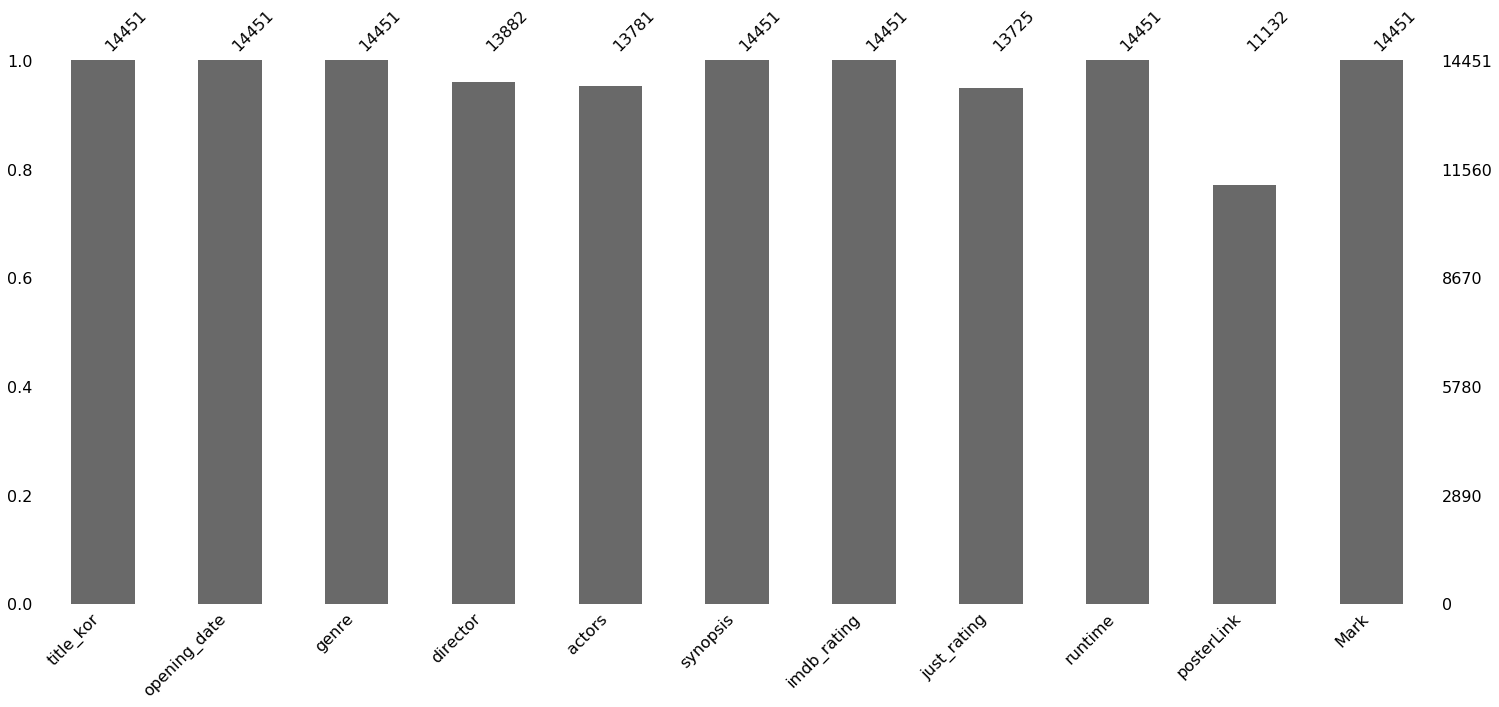

In [245]:
mnso.bar(df)

In [247]:
for i in df.columns: 
    null_rate = df[i].isna().sum() / len(df) * 100 
    if null_rate > 0 : 
        print("{}'s null rate :{}%".format(i,round(null_rate,2)))

# 출처: https://stricky.tistory.com/451 [The DataBase that i am good at]

director's null rate :3.94%
actors's null rate :4.64%
just_rating's null rate :5.02%
posterLink's null rate :22.97%


In [248]:
# 장르 번호 부여 용 dict 셋팅 
idx = {'1':'액션', '2':'애니메이션', '3':'코미디', '4':'범죄',
       '5':'다큐멘터리', '6':'드라마', '7':'판타지', '8':'역사',
       '9':'공포', '10':'가족', '11':'음악', '12':'스릴러',
       '13':'로맨스', '14':'SF', '15':'스포츠', '16':'전쟁',
       '17':'서부', '18':'Reality TV', '19':'Made in Europe'}

In [250]:
# 장르별 영화 분포를 보고자 시리즈 셋팅.
g = []
for i in idx:
    gen = len(df[df['genre'].str.contains(idx[i], na=False)])
    g.append(gen)
    # print(gene)
# g1 = len(df[df['장르'].str.contains('액션')])
# idx["1"]
print(g, len(g),'개 장르') 

[3800, 1243, 4371, 2091, 1237, 7307, 1888, 673, 2064, 1333, 499, 4067, 2656, 1567, 332, 592, 150, 0, 0] 19 개 장르


In [253]:
df_g = pd.DataFrame(list(idx.items()),
        columns=['Category_id', 'genre'],
        index=None)
df_g['Count_jenre'] = g  # 장르 개수 카운트한 컬럼 합치기
df_g.sort_values(by=['Count_jenre'], ascending=False, inplace=True)

In [254]:
df_g

,Category_id,genre,Count_jenre
5,6,드라마,7307
2,3,코미디,4371
11,12,스릴러,4067
0,1,액션,3800
12,13,로맨스,2656
3,4,범죄,2091
8,9,공포,2064
6,7,판타지,1888
13,14,SF,1567
9,10,가족,1333


In [278]:
df_g['genre'][:-2]

5       드라마
2       코미디
11      스릴러
0        액션
12      로맨스
3        범죄
8        공포
6       판타지
13       SF
9        가족
1     애니메이션
4     다큐멘터리
7        역사
15       전쟁
10       음악
14      스포츠
16       서부
Name: genre, dtype: object

In [268]:
[ c for c in df_g['genre'].values]

['드라마',
 '코미디',
 '스릴러',
 '액션',
 '로맨스',
 '범죄',
 '공포',
 '판타지',
 'SF',
 '가족',
 '애니메이션',
 '다큐멘터리',
 '역사',
 '전쟁',
 '음악',
 '스포츠',
 '서부',
 'Reality TV',
 'Made in Europe']

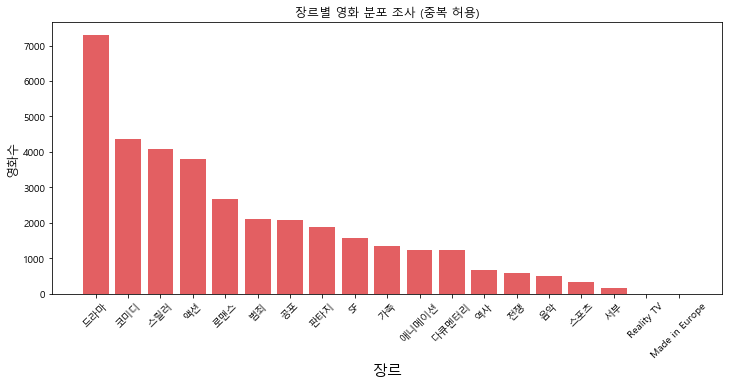

In [284]:
import matplotlib.pyplot as plt
import numpy as np

# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/malgun.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

plt.figure(figsize=(12,5))
plt.title('장르별 영화 분포 조사 (중복 허용)')
# x = np.arange(3)
x = df_g['genre']
years = [ c for c in df_g['genre'].values]
# values = [100, 400, 900]
values = df_g['Count_jenre']

# plt.bar(x, values, color=['r', 'g', 'b'])
# plt.bar(x, values, color='dodgerblue')
# plt.bar(x, values, color='C2')
plt.bar(x, values, color='#e35f62')
plt.xticks(x, years, rotation=45)
plt.xlabel('장르',size=15)
plt.ylabel('영화수',size=12)

plt.show()

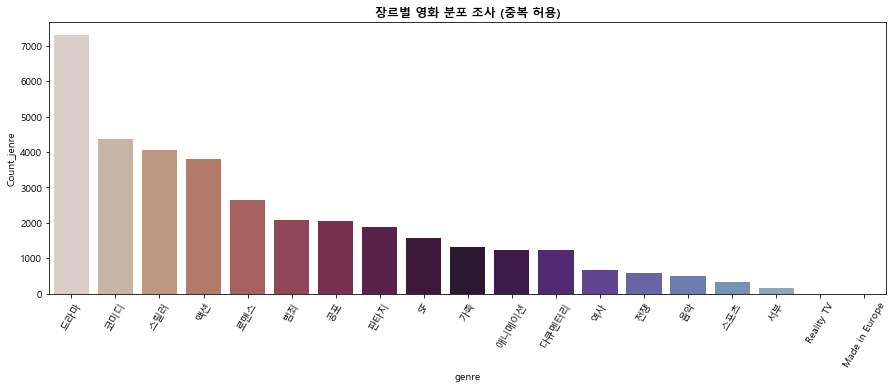

In [373]:
import seaborn as sns



# # x = np.arange(3)
# x = df_g['genre']
# years = [ c for c in df_g['genre'].values]
# # values = [100, 400, 900]
# values = df_g['Count_jenre']


plt.figure(figsize=(15,5))
plt.title('장르별 영화 분포 조사 (중복 허용)', fontweight="bold")
sns.barplot( x = df_g['genre'],
             y = df_g['Count_jenre'],
             palette='twilight_r')  # pink blues
plt.xticks(rotation=60)
plt.show()

In [ ]:
df_g['Count_jenre'] / sum(df_g['Count_jenre']) * 100

In [321]:
labels = [ c for c in df_g['genre'].values]
labels[0:5]

['드라마', '코미디', '스릴러', '액션', '로맨스']

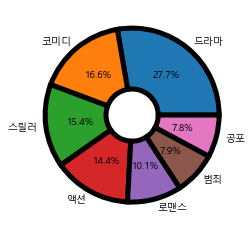

In [359]:
# 상위7개 카테고리 비율 

# ratio = ((df_g['Count_jenre'] / df_g['Count_jenre'].sum()) * 100)[0:6] # 값.
ratio = df_g['Count_jenre'][0:7]
labels = [ c for c in df_g['genre'].values][0:7]

wedgeprops={'width': 0.7, 'edgecolor': 'black', 'linewidth': 5} # 'w' 설정도 가능

plt.pie(ratio, labels=labels, autopct='%.1f%%', wedgeprops=wedgeprops)  #explode=[0.1,0.05,0.05,0.05,0.05,0.05,0.05],
plt.show()

In [ ]:
# 장르 분석 해줄 필요가 있는데. 